# Praca domowa 5

### Biblioteki i wczytanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./clustering.csv', header = None)
df.columns = ['x', 'y']

In [3]:
df.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


### Rozłożenie punktów w przestrzeni $R^{2}$

Ponieważ dane mają tylko dwa wymiary, można je prosto zwizualizować na scatterplotcie.

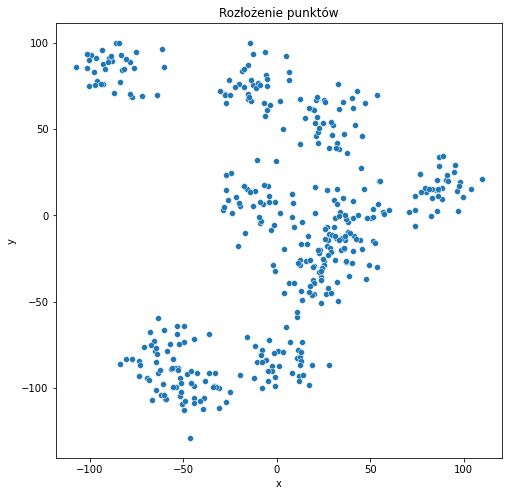

In [4]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df, x = 'x', y = 'y')
plt.title("Rozłożenie punktów")
plt.show()

Na pierwszy rzut oka dane nie są skupione w jednym punkcie, a kilky widocznych klastrach.

### KMeans

In [5]:
from sklearn.cluster import KMeans

def kmeans_fit_and_plot(df, k, **kwargs):
    X = df.copy()
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X)
    X['label'] = kmeans.labels_
    centres = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])
    
    sns.scatterplot(data = X, x = 'x', y = 'y', hue = 'label', **kwargs)
    sns.scatterplot(data = centres, x = 'x', y = 'y', color = "red", s = 200, alpha = 0.75, **kwargs)
    sns.scatterplot(data = centres, x = 'x', y = 'y', s = 300, color = "blue", marker = "+", **kwargs)
    plt.title("KMeans; n_clusters = " + str(k))

Poniżej narysuję wyniki klasteryzacji dla odpowiednio 4 i 6 klastrów.

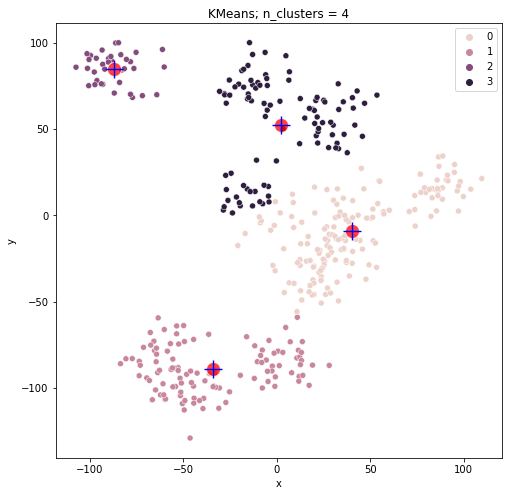

In [6]:
plt.figure(figsize = (8, 8))
kmeans_fit_and_plot(df, 4)

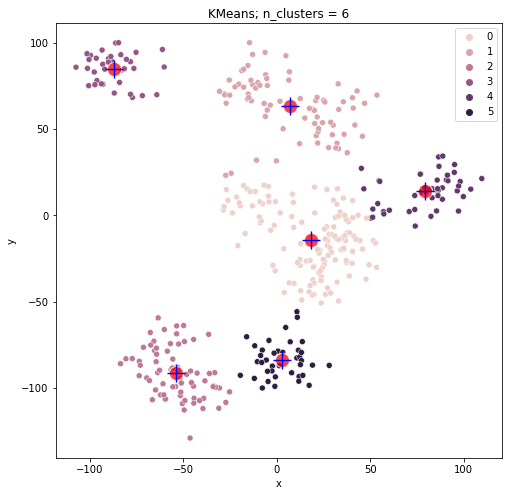

In [7]:
plt.figure(figsize = (8, 8))
kmeans_fit_and_plot(df, 6)

### Metoda łokcia

W celu znalezienia optymalnej ilości klastrów dla tego zbioru danych zastosuję metodę łokcia.

In [8]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

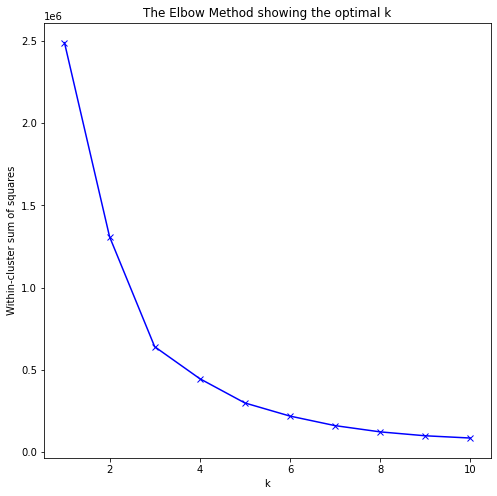

In [9]:
scores = count_wcss_scores(df, 10)
x_ticks = list(range(1, len(scores) + 1))
plt.figure(figsize = (8, 8))
plt.plot(x_ticks, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Według tej metody powinniśmy wybrać takie k, od którego powyższy wykres wolno maleje. W tym przypadku wybór nie jest oczywisty; wg. mnie dobrymi wartościami byłyby te pomiędzy 6 a 8. 

Przyjrzyjmy się wykresom z wartościami k z tego zakresu:

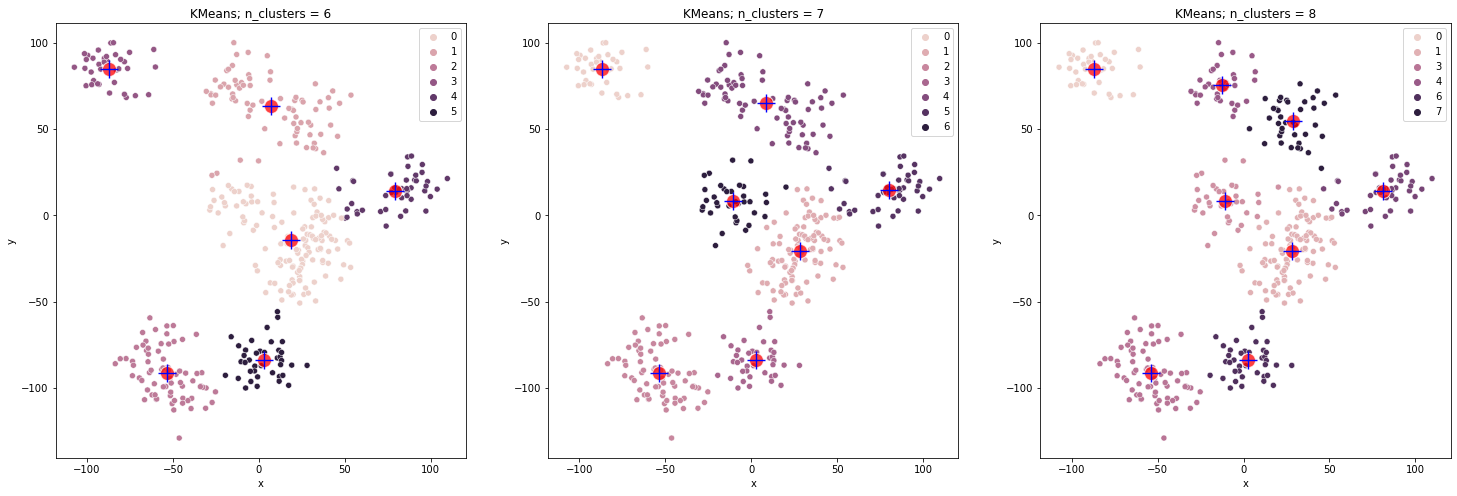

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

kmeans_fit_and_plot(df, 6, ax = ax[0])
ax[0].title.set_text("KMeans; n_clusters = " + str(6))

kmeans_fit_and_plot(df, 7, ax = ax[1])
ax[1].title.set_text("KMeans; n_clusters = " + str(7))

kmeans_fit_and_plot(df, 8, ax = ax[2])
ax[2].title.set_text("KMeans; n_clusters = " + str(8))

plt.show()

Z powyższych wykresów wynika, że podział na 8 klastrów daje najlepszy podział punktów. Wykres dla 6 i 7 klastrów również wygląda dobrze, jednak dla 8 klastrów granice są widoczne najwyraźniej.

### AgglomerativeClustering

In [11]:
from scipy.cluster import hierarchy

def plot_dendrogram(df):
    Z = hierarchy.linkage(df, method = 'average')

    plt.figure(figsize=(16, 8), facecolor='w', edgecolor='k')
    hierarchy.dendrogram(Z)
    plt.xticks([])
    plt.title("Dendrogram")
    plt.show()
    
    return Z

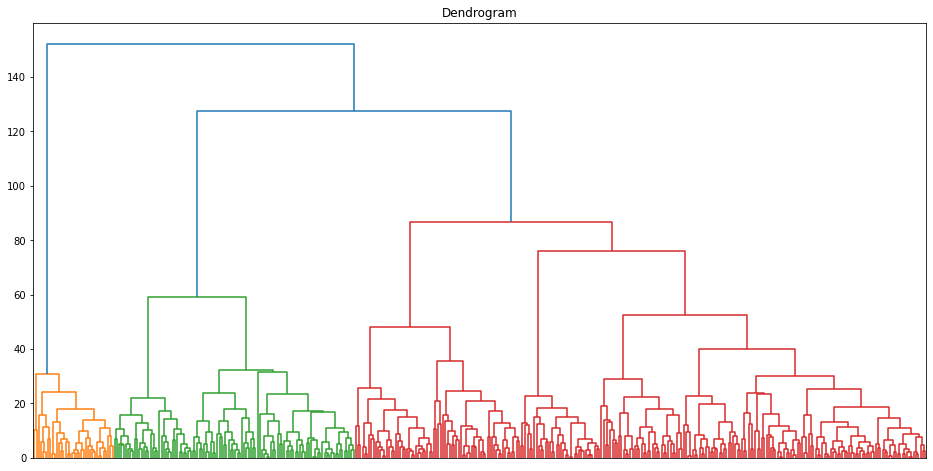

In [12]:
Z = plot_dendrogram(df)

Postawię linię odcięcia wysoko, żeby uzyskać duże klastry. Sprawdźmy jakie wyniki osiągniemy dla progu $100$.

In [13]:
def plot_dendrogram_with_threshold(Z, y):
    plt.figure(figsize=(16, 8), facecolor='w', edgecolor='k')
    hierarchy.dendrogram(Z)
    plt.xticks([])
    plt.title("Dendrogram; threshold = " + str(y))

    plt.axhline(y = y, color = "orange")

    plt.show()

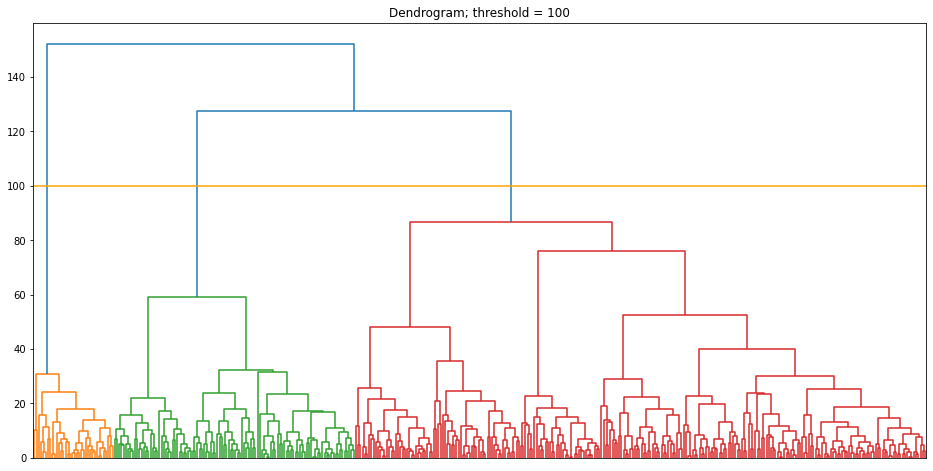

In [14]:
plot_dendrogram_with_threshold(Z, 100)

In [15]:
from sklearn.cluster import AgglomerativeClustering

def plot_agglomerative_clustering_with_threshold(df, y):
    model = AgglomerativeClustering(n_clusters = None, linkage = 'average', distance_threshold = y)
    y_pred = model.fit_predict(df)

    plt.figure(figsize = (8, 8))
    sns.scatterplot(data = df, x = 'x', y = 'y', hue = y_pred)
    plt.title("AgglomerativeClustering; threshold = " + str(y))
    plt.show()

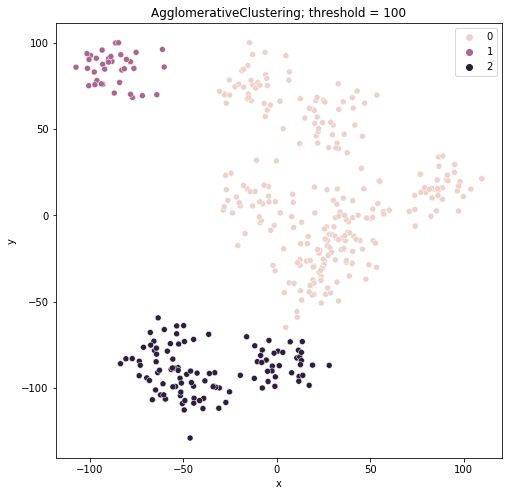

In [16]:
plot_agglomerative_clustering_with_threshold(df, 100)

Granice klastrów wydają się intuicyjne, jednak na dendrogramie widać, że można zejść trochę niżej i nadal uzyskać dość dobrze rozdzielone klastry.

Sprawdzę wyniki dla progu równego $65$. Wtedy czerwone połączenia zostaną lekko "rozerwane", natomiast zielone i pomarańczowe pozostaną całe.

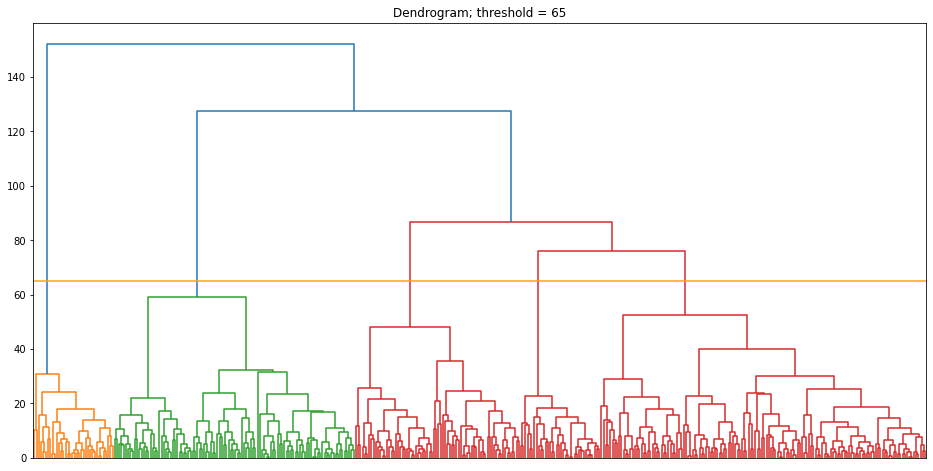

In [17]:
plot_dendrogram_with_threshold(Z, 65)

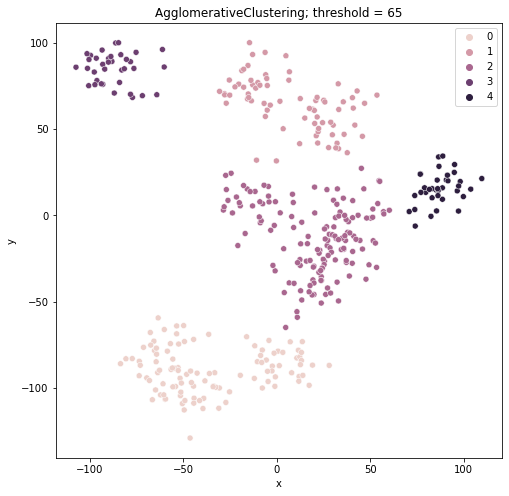

In [18]:
plot_agglomerative_clustering_with_threshold(df, 65)

Jest lepiej, ale można spróbować jeszcze rozdzielić zielony klaster na dwa - na dendrogramie wyraźnie widać, że można go rozdzielić na dwie grupy.

Sprawdzę wyniki dla progu $45$. Wtedy nastapi rozerwanie zielonego oraz kilku czerwonych klastrów, które również wyglądają na możliwe do przecięcia.

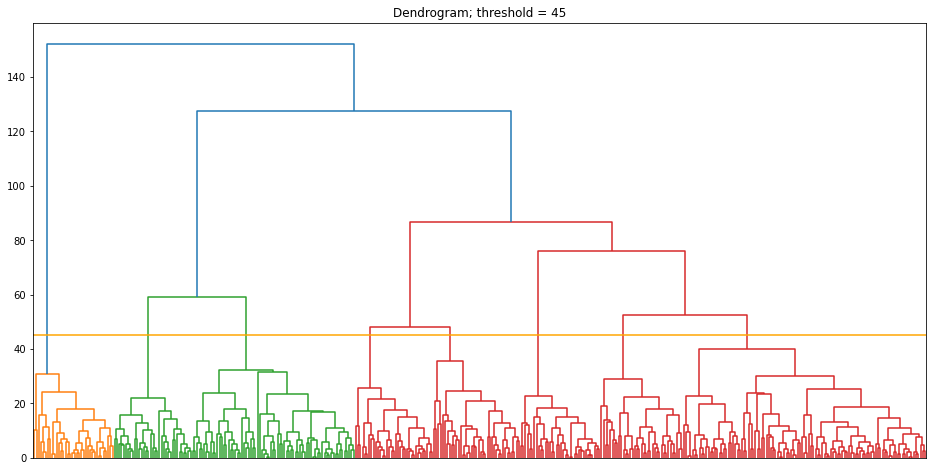

In [19]:
plot_dendrogram_with_threshold(Z, 45)

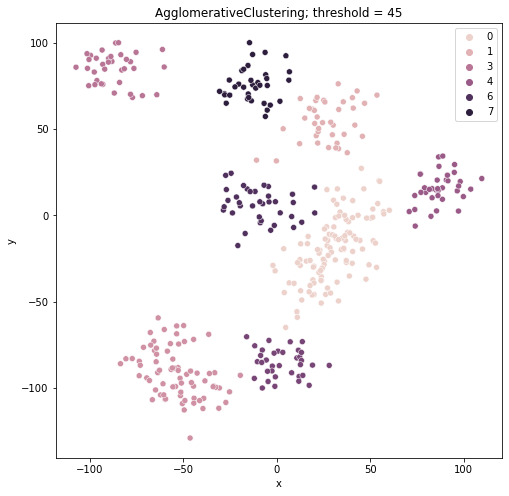

In [20]:
plot_agglomerative_clustering_with_threshold(df, 45)

Gdybym chciał zejść jeszcze niżej z progiem odcięcia, widać, że nawet małe zmiany będą powodowały zwiększenie liczby klastrów.

Przykładowo, dla progu przedstawionego poniżej (czyli $34$): 
* jeśli pójdę nieznacznie w górę - zniknie jeden klaster
* jeśli pójdę nieznanczie w dół - powstanie mnóstwo nowych klastrów zielonych, czerwonych i możliwe, że również pomarańczowych.

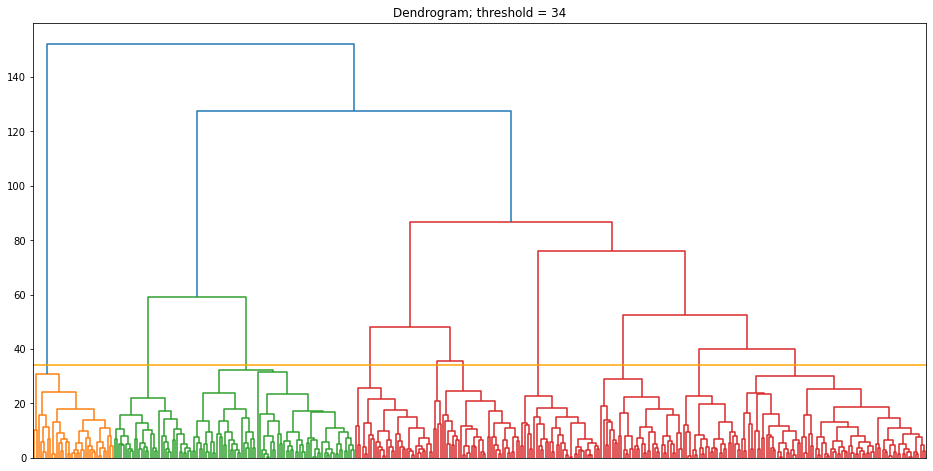

In [21]:
plot_dendrogram_with_threshold(Z, 34)

Dochodzę zatem do wniosku, że próg $45$ jest optymalnym progiem odcięcia. Taki podział generuje nam $8$ klastrów.

Taki sam rezultat otrzymałem w przypadku pierwszej metody, zatem, ostatecznie, **optymalna ilość klastrów w tym zadaniu wynosi 8**.